In [1]:
import spacy
spacy.load('en_core_web_sm')
nlp = spacy.load("en_core_web_sm")
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from nltk.text import Text

- Читаем текст

In [2]:
with open ('abbey.txt', encoding = 'utf-8') as f:
    my_text = f.read().split('\n\n')

- Делаем список пар слов и типов связей

In [3]:
new_text = [] #это нужно для лемматизации и распределения слов, потому что pymorphy не работает с английским.
pairs = [] #это будущий список пар
punct = ['.', ',', '!', '?', '“', '”', ';', ':', '-', '‘', '’'
        '"', '#', "'", '*', '"', '(', ')', 'CHAPTER']
for t in my_text:
    #print(t)
    d = nlp(t)
    for token in d:
        if token.lemma_ not in punct and token.lemma_ == 'talk':
            #my_part.add(token.pos_)
            c = [child for child in token.children]
            for n in c:
                if not str(n) in punct:
                    if not n.lemma_ == '-PRON-':
                        my_n = str(n.lemma_)
                    else:
                        my_n = str(n).lower()
                    #print('talk', n, token.dep_, n.dep_)
                    pairs.append(('talk', my_n, token.dep_))
                    cc = [child for child in n.children]
                    for w in cc:
                        if not str(w) in punct:
                            if not w.lemma_ == '-PRON-':
                                my_w = str(w.lemma_)
                            else:
                                my_w = str(w).lower()
                            #print(n, w, n.dep_)
                            pairs.append((my_n, my_w, n.dep_))
                            #my_part.add(n.pos_)
                            #my_part.add(w.pos_)
        if token.lemma_ not in punct and token.lemma_ != '-PRON-': #так он определяет начальную форму местоимения.
            new_text.append(str(token.lemma_))
        elif token.lemma_ not in punct and token.lemma_ == '-PRON-':
            new_text.append(str(token).lower)

- Делаем словари цветов для узлов и рёбер

Поскольку слишком сложно подобрать цвета для всех частей речи, я объединила глаголы и вспомогательные глаголы, а также имена существительные, собственные и местоимения-существительные. В дальнейшем часть местоимений распознаётся как знаки препинания. Кроме того, артикль *A* распознаётся как часть речи *X*, которую я объединила с *DET*.

In [4]:
node_colors = {'ADJ': 'magenta',
          'ADP': 'cyan',
          'ADV': 'yellow',
          'AUX': 'red',
          'CCONJ': 'darkmagenta',
          'DET': 'lime',
          'NOUN': 'deepskyblue',
          'PART': 'plum',
          'PRON': 'deepskyblue',
          'PROPN': 'deepskyblue',
          'SCONJ': 'violet',
          'INTJ': 'peru',
          'X': 'lime',
          'VERB': 'red',
          'PUNCT': 'deepskyblue'}
edge_colors = {'ccomp': 'magenta',
               'prep': 'cyan',
               'ROOT': 'black',
               'advcl': 'red',
               'conj': 'darkmagenta',
               'relcl': 'lime',
               'xcomp': 'deepskyblue',
               'dobj': 'plum',
               'advmod': 'violet',
               'nsubj': 'peru',
               'acomp': 'yellow',
               'dep': 'brown',
               'attr': 'gray',
               'pcomp': 'y',
               'parataxis': 'g'}

- Частотный словарь длятолщтны рёбер

In [5]:
#word_pairs = [(one, two) for (one, two, three) in pairs]
count = Counter(pairs)

- Граф

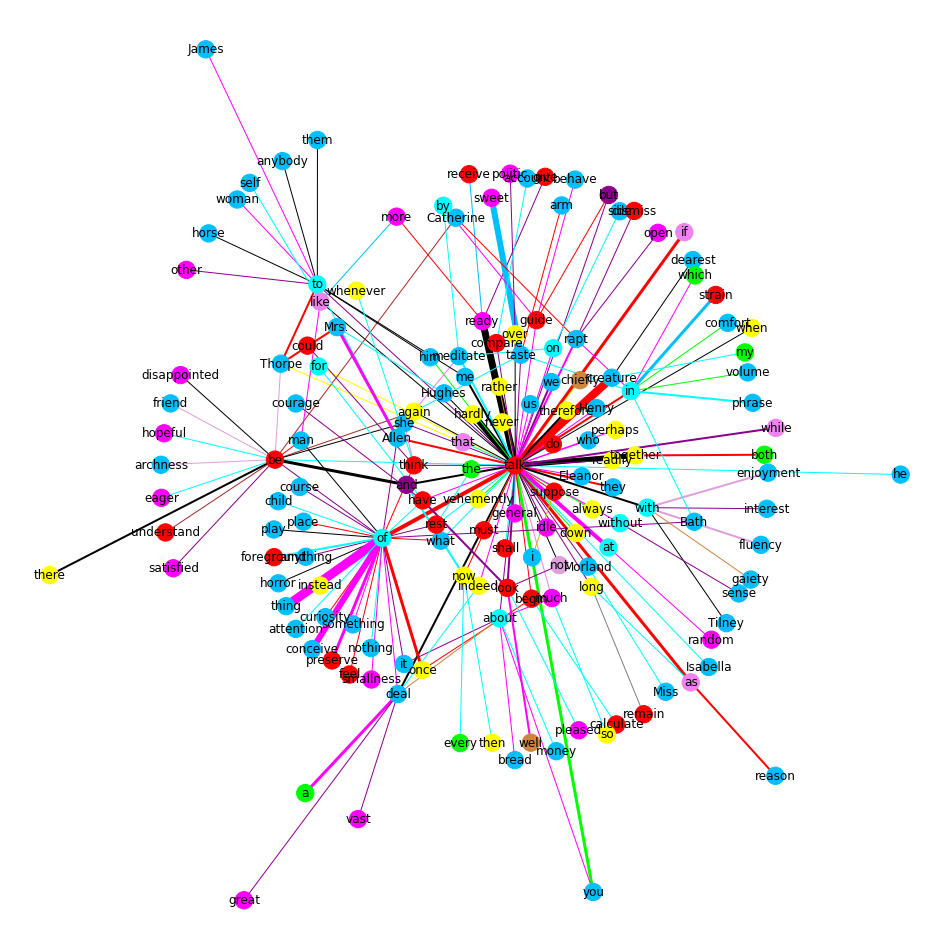

In [6]:
fig = plt.figure(figsize=(13, 13))
n_color = []
e_color = []
sizes = []
labels = []
G = nx.Graph()
for k, v in count.items():
    G.add_edge(k[0], k[1], weight=v)
    sizes.append(v)
    e_color.append(edge_colors[k[2]])
    labels.append(k[2])
    pos = nx.kamada_kawai_layout(G)
for node in G.nodes():
    n_color.append(node_colors[nlp(node)[0].pos_])
nx.draw(G, pos, edge_color=e_color, node_color = n_color, with_labels=True, width = sizes)

In [25]:
text = Text(new_text)

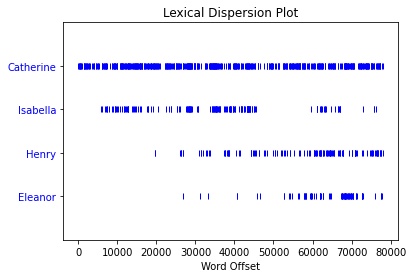

In [26]:
text.dispersion_plot(['Catherine', 'Isabella', 'Henry', 'Eleanor']);